# How Quantum Power Helps to Win a Card Game

A quantum coin game to illustrate the power of quantum superposition and interference

Based on the work by [Jan-R. Lahmann](https://twitter.com/JanLahmann) using [Qiskit](http://qiskit.org)

Inspired by the TED talk of Shohini Ghose  
["Quantum computing explained in 10 minutes"](https://www.ted.com/talks/shohini_ghose_quantum_computing_explained_in_10_minutes)


# The Card Game

Two players, A(lice) and B(ob), play a card game.  

* The game starts with one card up. Showing the King of Hearts.
* Player A starts and may either turn the coin or leave it as is. 
* B may now also turn the card or leave it as is.
* A then has the third and final move.
* However, the moves are hidden and have to be decided beforehand. 
* Movements are applied to the card, and the final state gets revealed
* **If it shows Heads, A wins; if it shows Tails, B wins.**


**In summary.**

#### The card Up
![cardup](card.jpg)

#### The card Down
![carddown](card_reverse.jpg)

**If the card ends up, Player A wins. If it ends down, Player B Wins. All movements are done in secret**

**Example 1**

Movement | Decision | Card
---------|----------|-----
1 (A) | Flip | ![cardup](card_reverse.jpg)
2 (B) | Flip | ![cardup](card.jpg)
3 (A) | Leave it | ![cardup](card.jpg)

__A WINS__

**Example 2**

Movement | Decision | Card
---------|----------|-----
1 (A) | Leave it | ![cardup](card.jpg)
2 (B) | Flip | ![cardup](card_reverse.jpg)
3 (A) | Leave it | ![cardup](card_reverse.jpg)


__B WINS__

## Is there a strategy to always win the game?

Players A and B will win with the same probability.  
There is no strategy for A (or B) to increase this probability - and certainly no strategy to always win.

"Human" and "classical computer" players can only decide to "flip" the coin in their options. That means adding an "X" Gate to our circuit (or NOT, in the classical world).

However a Quantum Computer can use the super power of superposition on its qubit (instead of a bit). For that it may use "H-Gates" in addition to "X"

In [1]:
# Dependencies and initial configuration

%pylab inline
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute, Aer
from qiskit.tools.visualization import plot_histogram
from ipywidgets import interact
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from qiskit.circuit.library.standard_gates import HGate, IGate, XGate


def MoveA1(move_A1): global moveA1; moveA1=move_A1;
def MoveB1(move_B1): global moveB1; moveB1=move_B1;
def MoveA2(move_A2): global moveA2; moveA2=move_A2;
    
def who_wins(counts):
    if len(counts)==1 :
        print('The winner is', 'A' if ("0" in counts) else 'B')
        if ("0" in counts):
            img = mpimg.imread('card.jpg')
        else:
            img = mpimg.imread('card_reverse.jpg')
        imgplot = plt.imshow(img)
        plt.axis('off')
        plt.show()
    else:
        count0=counts["0"]
        count1=counts["1"]
        print('The coin is in superposition of |0⟩ and |1⟩')
        print('A wins with probability',  "%.1f%%" % (100.*count0/(count0+count1)))
        print('B wins with probability',  "%.1f%%" % (100.*count1/(count0+count1)))
    return()

def build_circuit():
    q = QuantumRegister(1, name="coin") # create a quantum register with one qubit
    c = ClassicalRegister(1) 
    qc = QuantumCircuit(q, c) # creates the quantum circuit

    h = HGate(label='MAGIC')
    i = IGate(label='Do Nothing')
    x = XGate(label='Flip')
    
    # 1. move of A
    if   moveA1 == 0 : qc.append(i, [0]) #qc.i(q[0])
    elif moveA1 == 1 : qc.append(x, [0]) #qc.x(q[0]) 
    elif moveA1 == 2 : qc.append(h, [0]) #.h(q[0]) 

    # 1. move of B 
    if   moveB1 == 0 : qc.append(i, [0])
    elif moveB1 == 1 : qc.append(x, [0])     

    # 2. move of A
    if   moveA2 == 0 : qc.append(i, [0])
    elif moveA2 == 1 : qc.append(x, [0]) 
    elif moveA2 == 2 : qc.append(h, [0]) 
        
    qc.measure(q, c) # Measure the qubits
    return qc


Populating the interactive namespace from numpy and matplotlib


## Player A Starts

In [2]:
interact(MoveA1, move_A1={'Not Flip':0,'Flip':1});

interactive(children=(Dropdown(description='move_A1', options={'Not Flip': 0, 'Flip': 1}, value=0), Output()),…

## Player B Follows

In [3]:
interact(MoveB1, move_B1={'Not Flip':0,'Flip':1});

interactive(children=(Dropdown(description='move_B1', options={'Not Flip': 0, 'Flip': 1}, value=0), Output()),…

## Player A Last move

In [4]:
interact(MoveA2, move_A2={'Not Flip':0,'Flip':1});

interactive(children=(Dropdown(description='move_A2', options={'Not Flip': 0, 'Flip': 1}, value=0), Output()),…

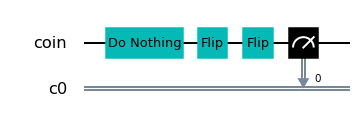

In [5]:
# The Quantum Circuit
qc = build_circuit()
qc.draw('mpl')

The winner is A


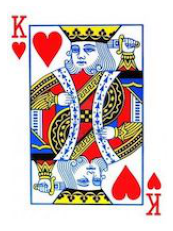

In [6]:
# execute the quantum circiut (coin moves) and identify the winner
backend = Aer.get_backend('qasm_simulator') # define the backend
job = execute(qc, backend, shots=200) # run the job simulation
result = job.result() # grab the result
counts = result.get_counts(qc) # results for the number of runs

#print(counts); # print the results of the runs
who_wins(counts); # celebrate the winner

## Now Player A is a Quantum Computer

Player B is Human, so only one movement is required

In [7]:
interact(MoveB1, move_B1={'Not Flip':0,'Flip':1});

interactive(children=(Dropdown(description='move_B1', options={'Not Flip': 0, 'Flip': 1}, value=0), Output()),…

In [11]:
# Quantum Computer uses Superposition! (2 is a "Hadamard Gate")
MoveA1(2)
MoveA2(2)

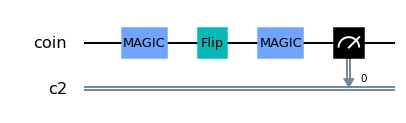

In [12]:
qc = build_circuit()
qc.draw('mpl')

{'0': 200}
The winner is A


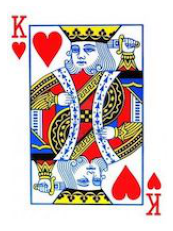

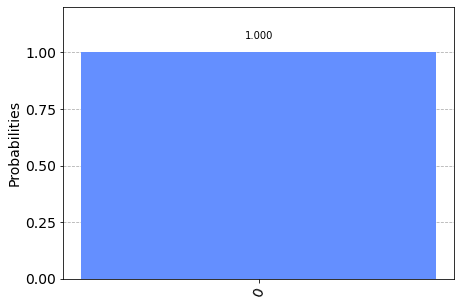

In [13]:
# execute the quantum circiut (coin moves) and identify the winner
backend = Aer.get_backend('qasm_simulator') # define the backend
job = execute(qc, backend, shots=200) # run the job simulation
result = job.result() # grab the result
counts = result.get_counts(qc) # results for the number of runs

print(counts); # print the results of the runs
who_wins(counts); # celebrate the winner
plot_histogram(counts) # Visualise the results

## Here comes the noise
Unfortunately, we live on the NISQ era. Noise Intermediate Scale Quantum Computers. This means our qubits are noisy and this affects greatly our calculations. We need to count for that fact.

{'0': 183, '1': 17}
The coin is in superposition of |0⟩ and |1⟩
A wins with probability 91.5%
B wins with probability 8.5%


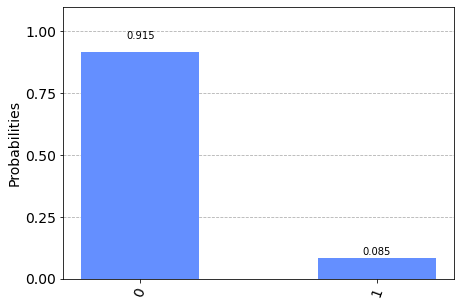

In [14]:
from qiskit.providers.aer.noise import NoiseModel, thermal_relaxation_error
noise_model = NoiseModel()
T1 = 0.001
T2 = 0.002
error = 0.001
thermal_error = thermal_relaxation_error(T1, T2, error)
noise_model.add_quantum_error(thermal_error, "MAGIC", [0])

job = execute(qc, backend, shots=200, noise_model=noise_model) # run the job simulation

result = job.result() # grab the result
counts = result.get_counts(qc) # results for the number of runs

print(counts); # print the results of the runs
who_wins(counts); # celebrate the winner
plot_histogram(counts) # Visualise the results